In [43]:
import pandas as pd
import numpy as np
import csv
import os
import time
import mpld3
from sklearn.manifold import TSNE

# os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS') 
data = np.genfromtxt('new_datas2.csv', delimiter = ',', names = True, dtype = None)
df = pd.DataFrame(data)

In [12]:
df = df.drop(["trip_number", "timestmp_local", "Hour_editing_needed", "Date", "speed_lim1", 
              "Hour", "Minute", "Second", "latitude", "longitude", "ratio", "road_type",
              "algorithm", "lag_speed"], axis = 1)
df['Mode'] = np.where(df['lonG'] >= 0, 'Acceleration', 'Deceleration')
df = df.dropna(axis = 0, how = "all")
rndperm = np.random.permutation(df.shape[0])

In [13]:
n_sne = 100
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], list(df)[:6] + list(df)[7: 21]].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 17.213681
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.572027
[t-SNE] Error after 125 iterations: 1.572027
t-SNE done! Time elapsed: 1.6078107357025146 seconds


In [5]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

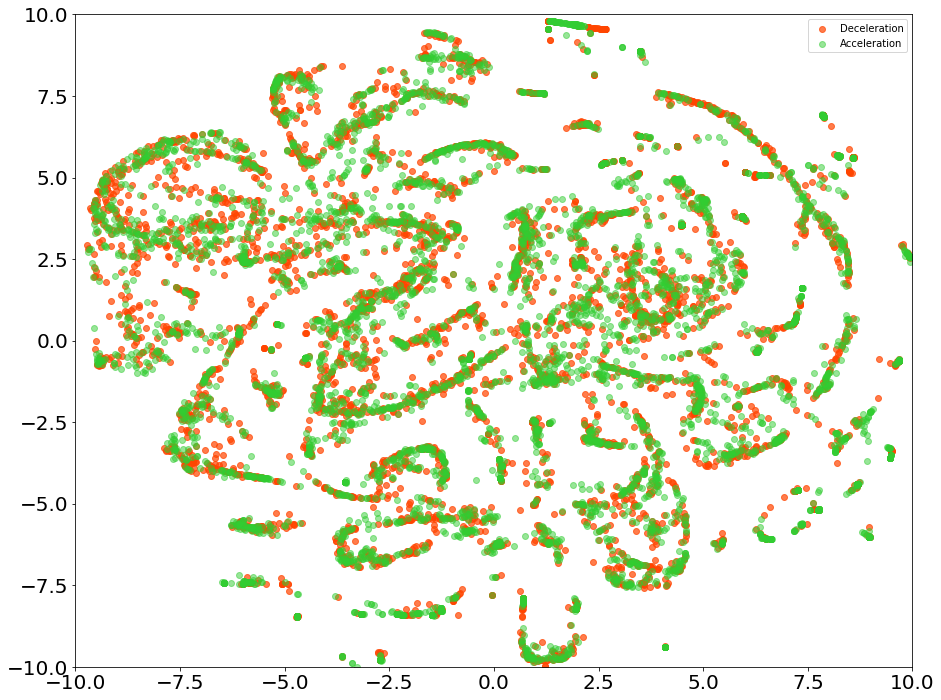

In [9]:
# Display acceleration / deceleration
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (15, 12))
ax.axis([-10, 10, -10, 10])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Deceleration'), label = "Deceleration", 
           color = "orangered", alpha = 0.7)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Acceleration'), label = "Acceleration", 
           color = "limegreen", alpha = 0.5)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

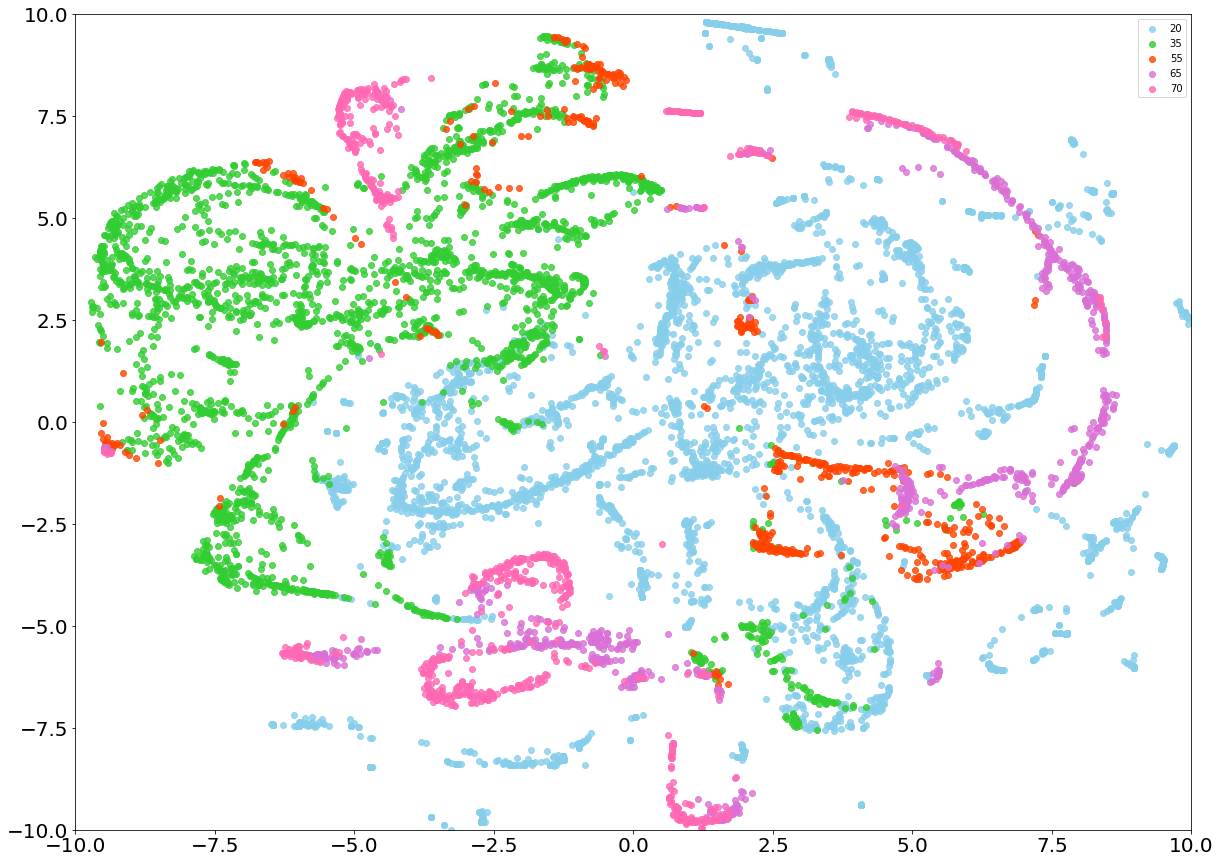

In [11]:
# Display speed_lim2
fig, ax = plt.subplots(figsize = (20, 15))
ax.axis([-10, 10, -10, 10])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 20),
           label = "20", color = "skyblue", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 35), 
           label = "35", color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 55),
           label = "55", color = "orangered", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 65),
           label = "65", color = "orchid", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['speed_lim2'] == 70),
           label = "70", color = "hotpink", alpha = 0.8)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [12]:
mpld3.save_html(fig, "test.html")

In [10]:
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], 
                                         list(df[['avg_speed', 'latG', 'lonG', 'ang_speed_gyro', 'avg_latG', 'avg_latG_mag']])].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.035328
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.215997
[t-SNE] Error after 300 iterations: 1.215997
t-SNE done! Time elapsed: 506.2262499332428 seconds


In [11]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

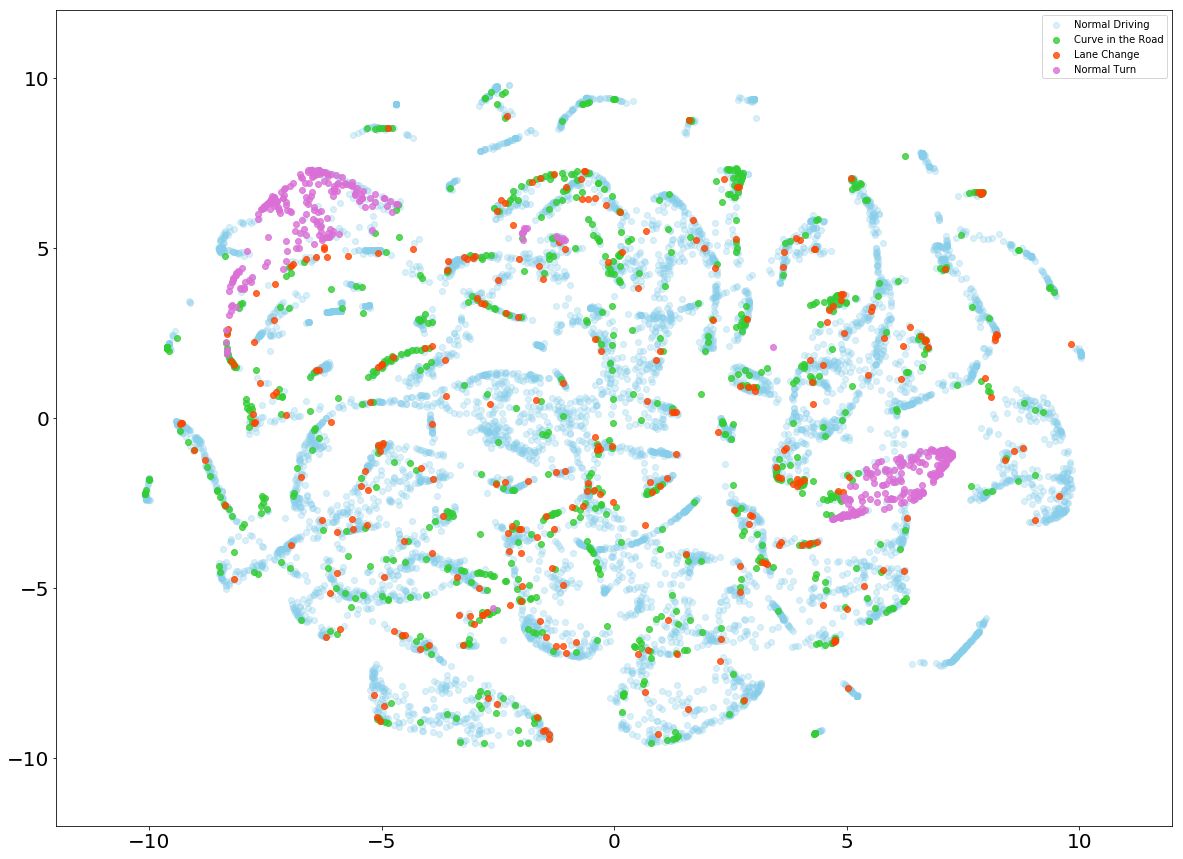

In [12]:
# Display algorithm: Curve in the road, Lane Change, Normal Driving, 
fig, ax = plt.subplots(figsize = (20, 15))
ax.axis([-12, 12, -12, 12])
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Driving'] == 1),
           label = "Normal Driving", color = "skyblue", alpha = 0.3)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmCurve_in_the_road'] == 1), 
           label = "Curve in the Road", color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmLane_Change'] == 1),
           label = "Lane Change", color = "orangered", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Turn'] == 1),
           label = "Normal Turn", color = "orchid", alpha = 0.8)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

### TSNE vs PCA
https://www.kaggle.com/vimary/tsne-vs-pca

In [45]:
df = df.drop(["trip_number", "timestmp_local", "Hour_editing_needed", "Date", "speed_lim1", 
              "Hour", "Minute", "Second", "latitude", "longitude", "ratio", "road_type",
              "lag_speed"], axis = 1)
df['Mode'] = np.where(df['lonG'] >= 0, 'Acceleration', 'Deceleration')
df = df.dropna(axis = 0, how = "all")

In [46]:
features = ['traffic_den', 'avg_speed', 'road_typeBusiness_District', 'road_typeFreeway', 'road_typeResidential_Road', 
            'speed', 'inc_mileage']
targets = ['speed_lim2']

Normalizing dataset with standard scaler. Mean of transformed features will be close to zero, and standard deviation also very close to 1.

In [47]:
# Basic
import numpy as np
import pandas as pd
# Plots
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Populating the interactive namespace from numpy and matplotlib


In [48]:
df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

Learning TSNE with 2 components and PCA with default number.

In [51]:
X_tsne = TSNE(learning_rate = 500, n_components = 2).fit_transform(df_norm[features][: 10000].values)

In [54]:
X_pca = PCA().fit_transform(df_norm[features][:10000].values)

Let's plot how pairs of 5 speed limits are divided in tsne 2D layout. Not very successful.

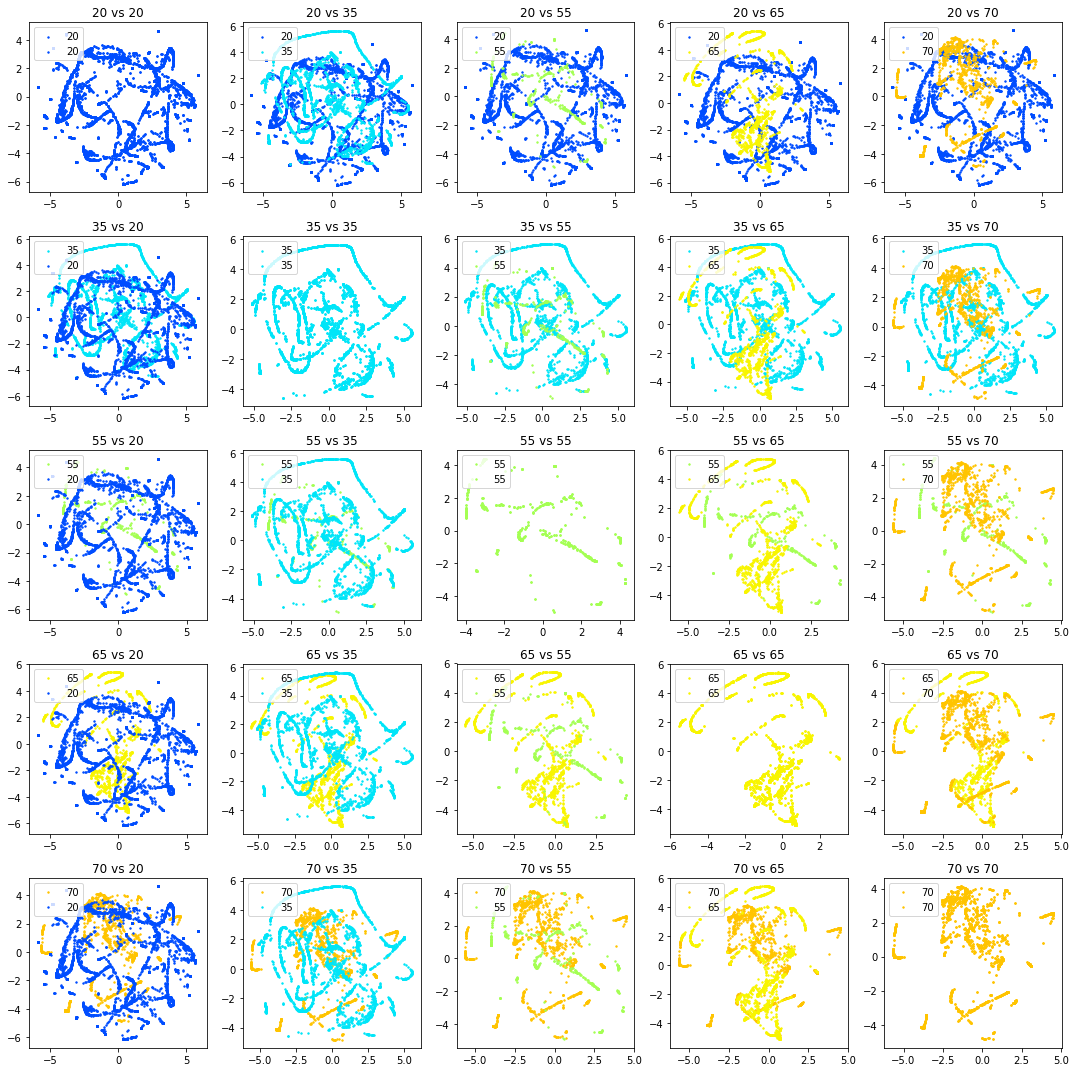

In [91]:
fig = figure(figsize=(15, 15))

cmap = plt.get_cmap('jet')
speed_lim = df['speed_lim2'][:10000].unique()

rows, cols = 5, 5
num = 1
for row, t1_id in zip(range(rows), speed_lim):
    for col, t2_id in zip(range(cols), speed_lim):
        subplot(rows, cols, num)
        X_i = X_tsne[np.where(df['speed_lim2'][:10000] == t1_id)[0]]
        X_j = X_tsne[np.where(df['speed_lim2'][:10000] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / 100), s = 2)
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / 100), s = 2)
        title(str(t1_id) + ' vs ' + str(t2_id))
        legend([str(t1_id), str(t2_id)], loc = 2)
        num += 1
fig.tight_layout()

All pairs are not divided nor by TSNE and PCA.

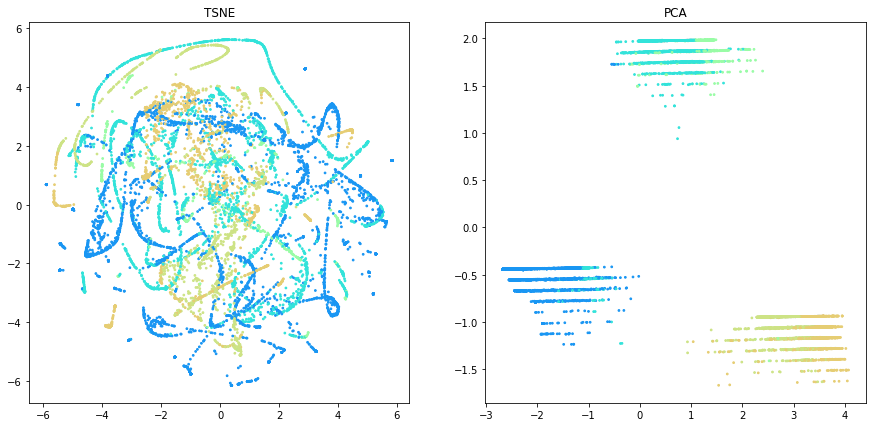

In [94]:
figure(figsize=(15, 7))
cmap = plt.get_cmap('rainbow')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(df['speed_lim2'][:10000] / 100), s = 3)
title('TSNE')

subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(df['speed_lim2'][:10000] / 100), s = 3)
title('PCA')

Layout is still not that good in detecting speed limit categories.

In [95]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans_tsne = KMeans(n_clusters = num_clusters).fit(X_tsne)
kmeans_pca = KMeans(n_clusters = num_clusters).fit(X_pca)

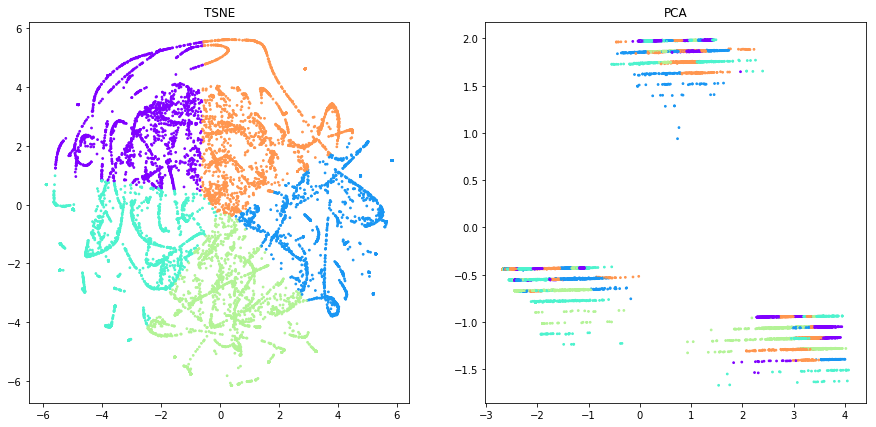

In [97]:
figure(figsize=(15, 7))
cmap = plt.get_cmap('rainbow')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters), s = 3)
title('TSNE')

subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters), s = 3)
title('PCA')

In [107]:
df_norm['tsne_cluster'] = 0
df_norm['tsne_cluster'][:10000] = kmeans_tsne.labels_
df_norm['pca_cluster'] = 0
df_norm['pca_cluster'][:10000] = kmeans_pca.labels_
df_tsne_mean = df_norm[: 10000].groupby('tsne_cluster').mean()
df_pca_mean = df_norm[: 10000].groupby('pca_cluster').mean()

C:\Users\WGU9\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\WGU9\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


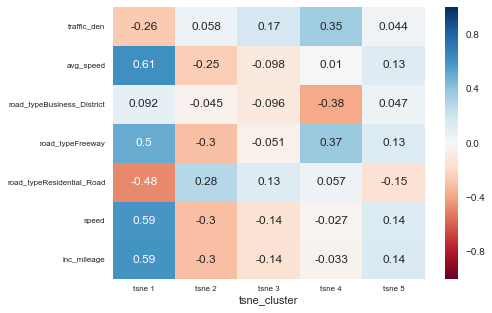

In [111]:
import seaborn as sns
figure(figsize = (7, 5))
ax = sns.heatmap(df_tsne_mean[features].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['tsne ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(features[::-1], rotation=0, fontsize=8)

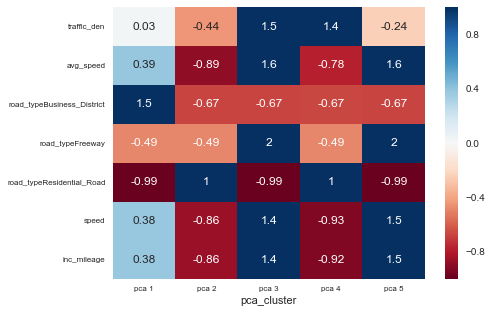

In [112]:
figure(figsize = (7, 5))
ax = sns.heatmap(df_pca_mean[features].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['pca ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(features[::-1], rotation=0, fontsize=8)